In [2]:
import tensorflow as tf
from tensorflow.keras import models, layers, datasets
import matplotlib.pyplot as plt 

In [4]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

In [6]:
train_images, test_images = train_images / 255.0, test_images / 255.0

In [20]:
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

In [8]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation ='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation = 'relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation ='relu'),
    layers.Flatten(),
    layers.Dense(64, activation= 'relu'),
    layers.Dense(10)
])

In [12]:
model.compile(optimizer='adam',
              loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [14]:
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data= (test_images, test_labels))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 12ms/step - accuracy: 0.3483 - loss: 1.7508 - val_accuracy: 0.5436 - val_loss: 1.2715
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.5884 - loss: 1.1674 - val_accuracy: 0.6181 - val_loss: 1.0762
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.6552 - loss: 0.9902 - val_accuracy: 0.6416 - val_loss: 1.0148
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.6919 - loss: 0.8816 - val_accuracy: 0.6810 - val_loss: 0.9415
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.7202 - loss: 0.7962 - val_accuracy: 0.6900 - val_loss: 0.8963
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.7417 - loss: 0.7346 - val_accuracy: 0.6854 - val_loss: 0.9041
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.7591 - loss: 0.6848 - val_accuracy: 0.7051 - val_loss: 0.8695
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.7742 -

In [16]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose =2)
print(f'\nTest accuracy: {test_acc}')

313/313 - 1s - 4ms/step - accuracy: 0.6986 - loss: 0.9032

Test accuracy: 0.6985999941825867


In [18]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


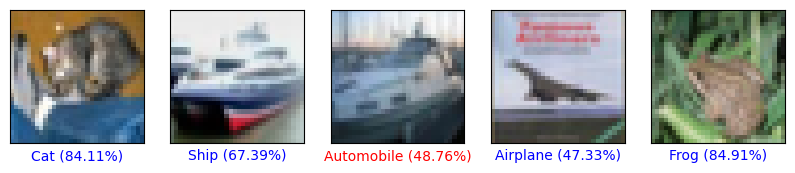

In [22]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)
    predicted_label = tf.argmax(predictions_array, axis=-1).numpy()
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    plt.xlabel(f"{class_names[predicted_label]} ({100 * tf.reduce_max(predictions_array).numpy():.2f}%)", color=color)

plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plot_image(i, predictions, test_labels, test_images)
plt.show()